<center>
<a href="https://www.tse-fr.eu/" ><img src="https://upload.wikimedia.org/wikipedia/commons/5/52/TSE_Logo_2019.png" style="float:left; width: "200"; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Machine learning scenario](https://github.com/wikistat/Apprentissage)

# GRC: Prediction of a bank product appetancy with <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> and <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Summary
The dataset is built with 825 customers of a bank, described by 32 variables. These variables give some informations about the bank use. Our goal is to predict a score for the Visa Premier card: we intend to compare several methods of machine learning (logistic regression, trees, extreme gradient boosting, svm or random forests).

## Introduction

### Data presentation
#### Variables
The variables are listed below. 
*Table: name and meaning of variables* Beware, some variables are written in capital letters and then in small letters after some transformations (logarithm, one hot encoding, etc). Names ending with L correspond to variables that are logarithmically transformed while names ending with Q or q correspond to qualitative variables. . 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**


**Answer the questions with the help of Python and Scikitlearn.**

# Theoretical Questions

### 1) 

We hereby consider a two-category classification problem with a general framework of Machine Learning pipeline. 
The "best" solution to a classification problem minimizes the risk over all possible classifiers, according to a designated loss function, and is called $f^*$. To that extent, a two-category classifier usually relates to the $0-1$ Loss function i.e.: 

$f^* = +1$ $\iff$  $P(Y=1| X ) \geq P(Y=0| X ) $
$ \iff P(Y=1| X ) \geq 1/2 $ 

and 

$f^* = 0$ otherwise



Plugging in the priors into the above formula, the Bayes Rule states that 

for $(X_i, Y_i)_{1 \leq i \leq N})$ such that $X \in R^P$ and $Y \in R$,

a training set $D_n = { (X_1, Y_1), ..., (X_n, Y_n)}$ i.i.d according to $P$,

the best solution $f^*$, predictor function in $F : { X(\Omega) --> Y(\Omega) a.s } $ yields 

$f^* (X) = +1$ $\iff$ $P(Y=1| X=x)$ $= \frac{{\pi_1}{f_1}(x)}{\sum \limits_{l=0}^{1}{{\pi_l}{f_l}}(x) } $   $\geq \frac{{\pi_0}{f_0}(x)}{\sum \limits_{l=0}^{1}{{\pi_l}{f_l}}(x) } = P(Y=0| X=x) $   

and 

$f^* (X) = 0$ otherwise
   $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$

 Indeed, one can further simply the above equation and rewrite: 

 $f^* = +1$ $\iff$ $P(Y=1| X=x)$ $\geq 1/2 $ 
 
 and 
 
 $f^* = 0$ otherwise


 since the denominator is strictly positive. 


Moreover, the Mean Classification Risk simply equals the expectation of the loss function i.e. the $0-1$ loss obtained by the classifier pipeline by misclassfying observations. The Risk equals 

$R(f) = P(Y \neq f(X) ) =  P(Y =1,  f(X) = 0 ) +  P(Y = 0 , f(X) = 1 ) $


Thus, the Mean Classification Risk yields: 

$E[R(f)] = \sum_{f \in F} \mathbb{1}_{Y \neq f(X)} * P(Y \neq f(X) ) $

### 2)

$ \forall f \in F, $

$ R(f) - R(f^*) = \int_{f \neq f^*}{} | 2P(Y=1| X=x) - 1| P_x (dx) = E_X [|2P(Y=1| X=x) - 1| \mathbb{1}_{f(X) \neq f^*(X)} $




$Proof.$

$ R(f) = P(Y \neq f(X) ) =  P(Y =1,  f(X) = 0 ) +  P(Y = 0 , f(X) = 1 ) $

so that using the Law of Iterated Expectations on the disjoints events, 

$E[E[ \mathbb{1}_{Y = 1, f(X) = 0 |X}]] + E[E[ \mathbb{1}_{Y = 0, f(X) = 1 |X}]]  $

since $f(X)$ is measurable with respect to $X$, we can factor it out and yield:

$ E [ \mathbb{1}_{f(X)=0} P(Y =1,  f(X) = 0 ) + \mathbb{1}_{f(X)=1} (1- P(Y =1,  f(X) = 0 ) )  $

if $f= f^*$, 

$ E [ \mathbb{1}_{P(Y =1,  f(X) = 0 ) \leq 1/2} P(Y =1,  f(X) = 0 ) + \mathbb{1}_{P(Y =1,  f(X) = 0 ) > 1/2} (1- P(Y =1,  f(X) = 0 ) )  $

$\iff $

$R(f^*) = E [ (\mathbb{1}_{P(Y =1,  f(X) = 0 ) \leq 1/2} + \mathbb{1}_{P(Y =1,  f(X) = 0 ) > 1/2} ) min(P(Y =1,  f(X) = 0 ),(1- P(Y =1,  f(X) = 0 ) ) )$


$\iff $

$R(f^*) = E[min(P(Y =1,  f(X) = 0 ),(1- P(Y =1,  f(X) = 0 ) ) ) \leq 1/2 $


 since
 
  $min(P(Y =1,  f(X) = 0 ),(1- P(Y =1,  f(X) = 0 ) ) ) \leq 1/2 $

  Now, given an arbitrary classifier $f$, one gets

  $R(f) - R(f^*) = E [ \mathbb{1}_{f(X)=0} P(Y =1,  f(X) = 0 ) + \mathbb{1}_{f(X)=1} (1- P(Y =1,  f(X) = 0 ) ) - \mathbb{1}_{f^*(X)=0} P(Y =1,  f^*(X) = 0 ) + \mathbb{1}_{f^*(X)=1} (1- P(Y =1,  f^*(X) = 0 ) ) ] $

  $\iff $

  $  E [ (\mathbb{1}_{f(X)=0} - \mathbb{1}_{f^*(X)=0} )P(Y=1| X=x) + (\mathbb{1}_{f(X)=1} - \mathbb{1}_{f^*(X)=1} )(1 - P(Y=1| X=x) )  $ 

  which in turn yields 

  $ E_X [(2P(Y=1| X=x) - 1) (f(X) = 0) -  \mathbb{1}_{f^*(X) = 0} ] $


### 3)

Linear Discriminant Analysis was first proposed by Fisher in 1936 as a method to predict (well separated) $k$ classes, in response to logistic regression model's instabilities. We hereby study the case of a two-category classification problem i.e., card-ownerniship or no. Using Bayes' Theorem to derive the best classifier, i.e., with the lowest possible $total$ error rate out of all classifiers (provided that the Gaussian model is correct): 

$P(Y=1| X=x)$ $= \frac{{\pi_k}{f_k}(x)}{\sum \limits_{l=1}^{K}{{\pi_l}{f_l}}(x) } $ $ \forall k = $  {$0;1$}      $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.1$)


such that 

${\pi_k}$ being the prior probability that a random chosen observation belongs to the class of card-owners coded as $k=1$ 

${f_k}(X)= P(X=x| Y=k)$  being the conditional density function of $X$ for an observation belonging to the $k^{th}$ class $ \forall k = $  {$0;1$}


We thus estimate prior ${\pi_k}$ and the conditional probability density function ${{f_k}}(X)$ by $\hat{\pi_k}$ and  $\hat{{f_k}}(X)$ respectively in order to plug them in the posterior $(1.1)$. 

We assume that the predictors $X$ are normally distributed according to a $N(\mu_k, \Sigma)$ with a class-specific mean-vector of size ($k$x$1$) and homoskedastic, that is, there is a common covariance matrix $\Sigma$ of size ($p$x$p$) across both classes. We plug the resulting multivariate gaussian distribution function in $(1)$ as the $\hat{{f_k}}(X)$.
The unbiased maximum likelihood estimates  $\hat\mu_k$ and $\hat\sigma^2$ for $\mu_k$ and $\sigma^2$ are used to compute ${{f_k}}(X)$ $ \forall k, \space \space  \forall p  $: 


$\hat\mu_{k,p} = \frac{1}{n_k}\sum \limits_{i:y_i =k}{}x_{i,p}$ 

$\hat\Sigma = \frac{1}{n_K}(x_i - \hat\mu_k)^T(x_i - \hat\mu_k)
  \forall k = $  {$0;1$} $ \space \space \space \space \space  \space \space (1.2)$


Naturally, $\hat{\pi_k}$ is equal to the empirical sample share of individual belonging to class $k$:


$\hat{\pi_k}$ = $\frac{n_k}{n} \forall k = $  {$0;1$} $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.3$)


The Bayes classifier thus assigns an observation $X=x$ to the class for which the estimate $\hat{P}(Y=1| X=x)$ is largest (i.e. greater than $1/2$).
Taking the log of ($1.1$) with $\hat{{f_k}}(X)$ and $\hat{\pi_k}$ and simplifying the constant terms yields the following Bayes decision boundary rule: 

"$Assign$ $y_i$ $to$ $k=1$ $\iff$ $2x^T(\mu_1 - \mu_2) + log(\pi_1) - log(\pi_2) \ge {\mu_1}^T{\mu_1} - {\mu_2}^T{\mu_2}$ and to $k=0$ otherwise."  ($1.4$)

Which is linear in $X$.


The Bayes decision boundary thus corresponds to the point where 
$ x= 2(\mu_1 - \mu_2)^{-1}({\mu_1}^T{\mu_1} - {\mu_2}^T{\mu_2} -log(\frac{\pi_1}{\pi_2})) = \frac{1}{2}[({\mu_1 + \mu_2})-(\mu_1 - \mu_2)^{-1}({log(\frac{\pi_1}{\pi_2})})]$ $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.5$)



The $LDA$ classifier plugs the estimates given in $(1.2)$ and $(1.3)$ into ($1.4$) in order to assign an observation $X=x$ to the most probable class.




## Data preparation
### Lecture 
The original dataset has been transformed after an important preprocessing step in this [notebook](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb). We skip this step today! 

In [ ]:
# Library Importation
import numpy as np
import socket
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
# Lecture of the data frame
#files.upload()

vispremv = pd.read_table( 'C:/Users/Charlotte/Desktop/TSE/M2/MATHS OF DEEP LEARNING/DATA/vispremv.dat.txt', delimiter = ' ' )
#Give the size of the dataset


In [ ]:
vispremv.head()

,SEXEQ,FAMIQ,PCSPQ,kvunbq,vienbq,uemnbq,xlgnbq,ylvnbq,rocnbq,nptagq,...,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL,CARVP
148009,Shom,Fcou,Pint,K1,V1,U2,X2,Y2,R1,N0,...,2,13.161865,2,12.110635,14,0,14.080718,13.230263,0.693147,Coui
552427,Shom,Fcou,Pint,K0,V0,U1,X0,Y1,R0,N0,...,0,0.000000,1,8.132413,0,0,11.717872,0.000000,0.000000,Coui
556005,Shom,Fseu,Psan,K0,V0,U2,X1,Y2,R1,N0,...,1,10.743178,2,10.309286,14,0,11.329303,0.000000,0.000000,Coui
556686,Shom,Fseu,Pouv,K0,V1,U2,X2,Y2,R1,N1,...,3,12.899220,2,11.203025,11,1,13.111856,9.972267,2.772589,Coui
642680,Shom,Fcou,Pint,K0,V0,U2,X1,Y2,R1,N0,...,1,10.457976,2,9.190546,27,0,11.304904,0.000000,1.386294,Coui


In [ ]:
vispremv = vispremv.drop_duplicates()

In [ ]:
# Produce a list of quantitative variables
vispremv.describe()


,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,132.574788,42.573848,0.627211,2.371296,6.715418,0.827903,4.477338,1.868891,2.394713,1.028222,...,1.468485,0.649106,4.161701,0.760113,4.726685,8.564440,0.136406,9.373976,3.043170,1.189791
std,93.499830,11.912343,0.685315,1.464376,4.907295,1.279475,5.473534,3.680483,4.540024,0.501554,...,1.280262,0.794352,5.205502,0.782235,4.662683,11.738092,0.379837,3.313518,4.665580,1.587594
min,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,33.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067305,0.000000,0.000000
50%,130.000000,43.000000,0.693147,2.564949,8.652248,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.882802,2.000000,0.000000,10.075969,0.000000,0.000000
75%,204.500000,52.000000,1.098612,3.349750,10.962298,1.945910,10.483833,0.000000,0.000000,1.000000,...,2.000000,1.000000,10.033572,1.000000,9.651494,14.000000,0.000000,11.649131,6.216606,2.441401
max,393.000000,65.000000,3.367296,7.451242,13.785052,4.605170,15.060512,13.123924,14.296852,4.000000,...,9.000000,4.000000,13.270100,4.000000,13.785052,69.000000,4.000000,16.045468,15.770893,4.905275


Verify that most of the variables are described by a quantitative and a qualitative version.

Qualitative variables  (sexe, csp, famille)  are transformed into quantitative ones except `CARVP`. How? 

In [ ]:
vispremv.dtypes

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

In [ ]:
vispremv = vispremv.loc[:,~vispremv.columns.duplicated() ]

In [ ]:
# Transformation of qualitative variables into quantitative 0/1 ones.
# Use pd.get_dummies

vispremDum = pd.get_dummies( vispremv[['SEXEQ', 'FAMIQ', 'PCSPQ']] ) 
vispremDum

vispremDum.drop( ['SEXEQ_Sfem', 'FAMIQ_Fseu'], axis = 1, inplace = True )

vispremNum = vispremDum.select_dtypes( exclude = ['object'] )

# Pre processing: Scaling 


# Follows Standard Normal Distribution (the mean is not a statistic that is robust to outliers, the median is)
normalized_df = ( vispremNum - vispremNum.mean() )/ vispremNum.std()

# Scales in the range [0,1] for positives real values or else in [-1,1] for negative real values.
# All inliers are compressed in [0, 0.005]. It is not robust to outliers 
min_max_df = ( vispremNum - vispremNum.min() ) /( vispremNum.max() - vispremNum.min() )

# Robust Scaler scales statistics that are robust to outliers: 
# it removes the median and scales the data in the range between the 1st and 3rd quartiles or the 
# interquartile range.

robust_df = ( vispremNum - vispremNum.median() ) / ( vispremNum.quantile( 0.25 ) - vispremNum.quantile( 0.75 ) )

vispremR = pd.concat( [vispremDum, robust_df], axis = 1 )

print( vispremR.columns )




# Simplified Tanh Transformation 


m = np.mean( vispremNum ) 
std = np.std( vispremNum ) 

vispremR = 0.5 * (np.tanh(0.01 * ((vispremNum - m) / std)) + 1)


print( vispremR.columns )


Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan', 'SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad',
       'PCSPQ_Pemp', 'PCSPQ_Pint', 'PCSPQ_Pouv', 'PCSPQ_Psan'],
      dtype='object')


In [ ]:
vispremR.isnull().sum()

SEXEQ_Shom       0
FAMIQ_Fcou       0
PCSPQ_Pcad       0
PCSPQ_Pemp       0
PCSPQ_Pint       0
PCSPQ_Pouv       0
PCSPQ_Psan       0
SEXEQ_Shom       0
FAMIQ_Fcou       0
PCSPQ_Pcad    1032
PCSPQ_Pemp     896
PCSPQ_Pint       0
PCSPQ_Pouv       0
PCSPQ_Psan       0
dtype: int64

In [ ]:
vispremR = vispremR.loc[:,~vispremR.columns.duplicated() ]

In [ ]:
vispremR.isnull().sum()

SEXEQ_Shom    0
FAMIQ_Fcou    0
PCSPQ_Pcad    0
PCSPQ_Pemp    0
PCSPQ_Pint    0
PCSPQ_Pouv    0
PCSPQ_Psan    0
dtype: int64

** **texte en gras**Q** How many samples and how many variables?

In [ ]:
#TODO Compute the number of samples and the number of variables

vispremR.shape

#There are 1063 samples and 7 variables in the dataset.

(1063, 7)

In [ ]:
# The variable CARVP is modified into 0/1
y = vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

In [ ]:
vispremv["CARVP"] = vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

### Extraction of the learning and test set

In [ ]:
rd_seed = 111 # Modify this sieve initialization
npop = len(vispremv)
#TODO Find xApp,xTest,yApp,yTest with the help of train_test_split
#We will place 200 samples in the test set
xApp,xTest, yApp, yTest = train_test_split( vispremR , y, test_size = 200, random_state = rd_seed )

xApp.shape

(863, 7)

In [ ]:
vispremv.shape

(1063, 54)

## [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
This "old" method is still commonly used, mainly because of its simplicity, interpretability and diffusion over years.

### Estimation and optimization
The model selection procedure involves a statistical penalization: *ridge*, Lasso or a combination of both (*elastic net*). The behaviour of the model selection in Python is not exactly comparable with the one used in R (*stepwise, backward, forward*) that optimizes *AIC*

#### *Lasso* Optimization


We first consider the **Lasso** penalty, which is proportional to the L1 norm of the  ou la pénalité est proportionnelle à la norme 1 de l'estimateur (ce qui parameter we are looking for. This penalty induces sparsity of the response coefficient vector.

We recall that the logistic regression model defined within our framework aims at estimating the conditional probability that a card-owner possesses the set of attributes $X$=$x$ (e.g. up to 10 months of consumer seniority, with at most 50 transfers per months on average, at most 2 life insurances etc..). The underlying parametric assumption states that, in our sample, the conditional odds of owning a card i.e., $ \frac{P(Y=1|X)}{1-P(Y=1|X)}$ has a logit linear in $X$ (see below):

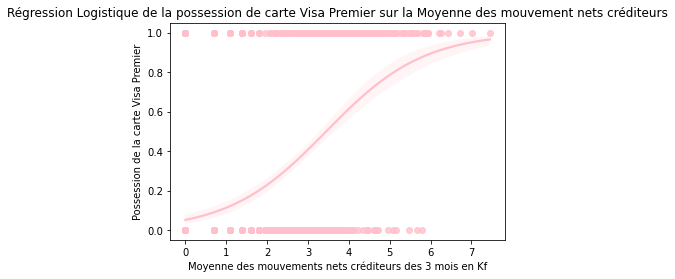

In [ ]:
import seaborn as sns
#sns.regplot( x = vispremv['ITAVCL'], y = vispremv['CARVP'], data = vispremv, logistic = True )
sns.set_palette("husl", 3)
sns.color_palette("husl", 3)
ax = sns.regplot( x = vispremv['MOYRVL'], y = vispremv['CARVP'], data = vispremv, logistic = True, color= 'pink' )
sns.axes_style("whitegrid")
ax.set( xlabel = "Moyenne des mouvements nets créditeurs des 3 mois en Kf", ylabel = "Possession de la carte Visa Premier" )
plt.title("Régression Logistique de la possession de carte Visa Premier sur la Moyenne des mouvement nets créditeurs")
plt.show(ax)

,SEXEQ,CARVP
0,Sfem,0.139303
1,Shom,0.455371


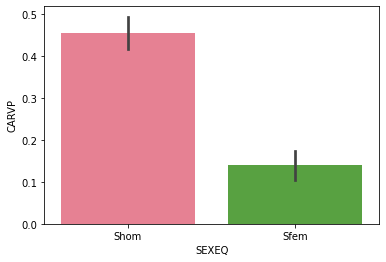

In [ ]:
sns.barplot( x = vispremv['SEXEQ'],y = vispremv['CARVP'] , data = vispremv )
vispremv.groupby( 'SEXEQ' ,as_index = False ).CARVP.mean()

We observe a substantial over-representation of male card-owners in our sample (i.e., 45% versus 14% of for males and females respectively), it can potentially gives rationale for results of our models throughout the following sections.

In [ ]:
vispremv.corr()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL,CARVP
RELAT,1.000000,0.379882,0.064888,0.214777,0.249508,0.126643,0.117589,0.044892,0.056658,0.073264,...,0.220438,0.213878,0.169615,0.173697,0.150623,-0.019603,0.272643,0.307121,0.005465,-0.045189
AGER,0.379882,1.000000,0.078152,0.207690,0.200717,0.092824,0.084364,0.014104,0.090800,0.046301,...,0.047471,0.094836,0.158785,0.206184,0.007075,-0.101598,0.257008,0.256945,-0.027979,0.118632
OPGNBL,0.064888,0.078152,1.000000,0.492103,0.133642,0.191050,0.296850,0.176681,0.222123,0.319572,...,0.121592,0.134393,0.146853,0.148657,0.170622,0.012927,0.221971,0.170435,0.194434,0.285980
MOYRVL,0.214777,0.207690,0.492103,1.000000,0.373422,0.317355,0.455462,0.247835,0.357448,0.482495,...,0.259134,0.288905,0.341304,0.381314,0.515586,0.005469,0.513791,0.291548,0.286197,0.443863
TAVEPL,0.249508,0.200717,0.133642,0.373422,1.000000,0.141537,0.138215,0.002225,0.123355,0.087370,...,0.579756,0.712218,0.599411,0.718242,0.219111,-0.100534,0.675886,0.386200,-0.110554,0.142631
ENDETL,0.126643,0.092824,0.191050,0.317355,0.141537,1.000000,0.821748,0.318204,0.617301,0.274219,...,0.192354,0.140048,0.092086,0.086091,0.211867,-0.024130,0.123932,0.129283,0.238501,0.128460
GAGETL,0.117589,0.084364,0.296850,0.455462,0.138215,0.821748,1.000000,0.544828,0.677055,0.363998,...,0.220336,0.149099,0.139990,0.101268,0.313753,-0.032795,0.090745,0.159005,0.382724,0.287284
GAGECL,0.044892,0.014104,0.176681,0.247835,0.002225,0.318204,0.544828,1.000000,0.252202,0.229298,...,0.065125,0.024167,0.066214,0.001105,0.227573,0.007579,-0.120843,0.070261,0.458538,0.234214
GAGEML,0.056658,0.090800,0.222123,0.357448,0.123355,0.617301,0.677055,0.252202,1.000000,0.265906,...,0.174508,0.146462,0.090581,0.066198,0.247356,-0.021650,0.126111,0.104032,0.282986,0.251796
KVUNB,0.073264,0.046301,0.319572,0.482495,0.087370,0.274219,0.363998,0.229298,0.265906,1.000000,...,0.135961,0.128988,0.144475,0.141517,0.328210,0.019315,0.214381,0.115959,0.304726,0.297697


In [ ]:
vispremv.corr().unstack().sort_values( ascending = False ).drop_duplicates()

RELAT   RELAT     1.000000
MOYRVL  QCREDL    0.931287
YLVNB   YLVMTL    0.846740
BOPPNL  QCREDL    0.844869
XLGMTL  XLGNB     0.836020
                    ...   
ITAVCL  GAGECL   -0.120843
CARVP   NPTAG    -0.124327
QSMOY   GAGECL   -0.137718
ITAVCL  JNBJDL   -0.140939
QSMOY   JNBJDL   -0.203584
Length: 407, dtype: float64

<AxesSubplot:>

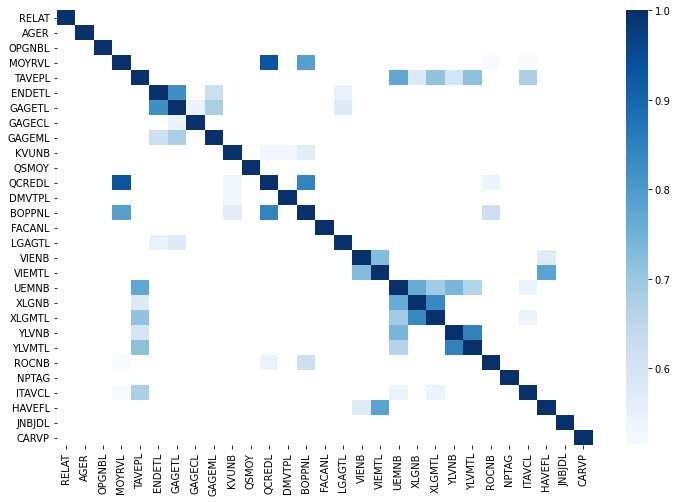

In [ ]:
corr = vispremv.corr()
kot = corr[abs( corr ) >= .5]
plt.figure( figsize = ( 12,8 ) )
sns.heatmap( kot, cmap = "Blues" )

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit( yApp ,xApp.loc[:,~xApp.columns.duplicated()] )
result = logit_model.fit( maxiter = 500, method = 'nm' )
print( result.summary2() )

C:\Users\Charlotte\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.184     
Dependent Variable: CARVP            AIC:              911.8644  
Date:               2021-10-06 18:01 BIC:              945.1873  
No. Observations:   863              Log-Likelihood:   -448.93   
Df Model:           6                LL-Null:          -550.23   
Df Residuals:       856              LLR p-value:      5.3104e-41
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     500.0000                                     
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
SEXEQ_Shom    1.0609    0.1810    5.8604  0.0000   0.7061   1.4157
FAMIQ_Fcou   -0.5783    0.1744   -3.3152  0.0009  -0.9202  -0.2364
PCSPQ_Pcad    2.5033    0.8577    2.9186  0.0035   0.8222   4.1843
PCSPQ_Pemp   -0.3987    0.2304

With the classic logistic regression method, the matrix of predictors $X$ is not singular because of high correlation (see below) and is thus not invertible. The gradient descent estimates are not consistent and we need to used to a penalyzed version of the logistic regression using Lasso or Ridge.  

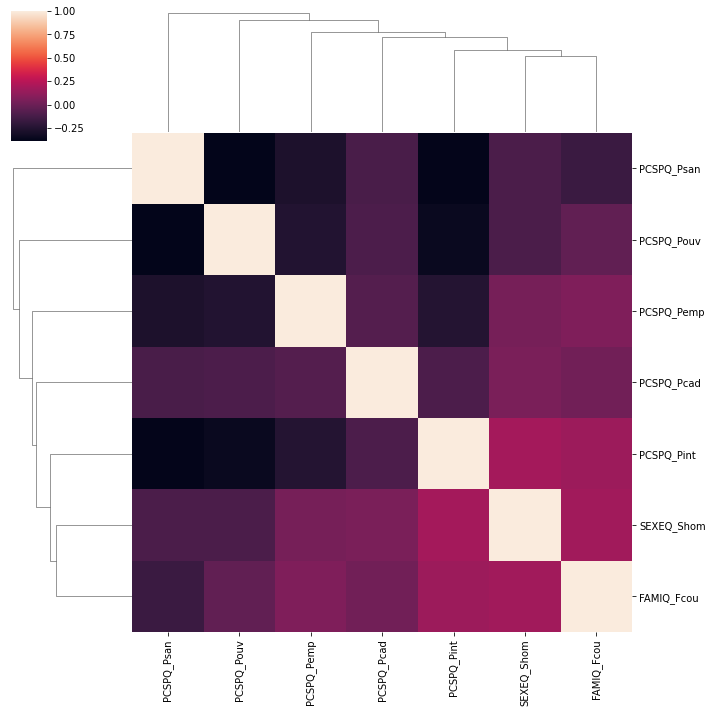

In [ ]:
import seaborn as sns
sns.clustermap( xApp.loc[:,~xApp.columns.duplicated() ].corr() )

We hereby fit the data to a Lasso Logit Regression Model in order to reduce the number of regressors considered in the prediction of Visa credit card ownership.
In particular, the objective loss function is equal to the negative log-likelihood function $L(X;\beta)$ added to a regularization parameter $\lambda$ controling for the $X$ matricial size $p$ with the $L_1$ norm (after convex relaxation of the optimization problem with the $L_0$ norm in order to have a sparse model). The minimization problem thus involves the estimation of the new parameter $\lambda$ prior to the predictors parameters $\beta$. The final problem is a convex optimization problem and requires Slater and KKT assumptions to be validated.

$min_{\lambda, \beta} S(\lambda;\beta) = L(X;\beta) + \lambda|\beta|_{1}$ $\space \space \space \space \space \space \space \space \space (1.1)$

where $ L(X;\beta) = -log(\prod_{i:Y_i = 1} p(X_i) \prod_{j:Y_j = 0} (1-p(X_j)) $
and $p(X)=\frac{e^{X^T\beta}}{1 + e^{X^T\beta}}$ 

which is equivalent to minimizing the cross-entropy loss function.
Thanks to the log-transformation of the likelihood function, we recover a convex optimization problem that can be solved using gradient descent methods.

The Lasso thus shrinks the $\beta$ coefficient estimates towards zero, with some of those coefficient estimates being exactly equal to zero when $\lambda$ goes to infinity. Provided that $\lambda$ is chosen appropriately, the Lasso estimator $\hat\beta(\lambda)$ is consistent. The method yields a $sparse$ model that calls for a cross-validation of the $\lambda$ parameter estimate.

The $k$-folded cross-validation procedure consists in defining a grid of possible values for the $\lambda$ parameter to explore, partitioning the training sample in $k=5$ sub-samples and fitting the loss function in (1.1) for a fixed value of $\lambda$ on all partitions but partition $k$. For each value of $\lambda$ defined by the grid, we sum the five residuals obtained, one cell of the grid at a time. We then compute the residuals sum of squares on the $ Grid(\lambda) $ and minimize such convex function with respect to $\lambda$.

To conclude, the Lasso coefficient can be thought as a constraint optimization program's solution. Indeed, it exactly corresponds to the vector of $p$ estimates that lead to the smallest cross-entropy, subject to the constraint that there is a budget $s$ for how large the estimates can be.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Grid of penalty parameters
param = [ {"C": [ 0.5, 1, 5, 10, 12, 15, 30 ]} ] # dictionary of the values of C used for GridSearchCV
# TODO
# 1. Define a model (logistic regression)
# 2. Use the penalty="l1"
# 3. Use GridSearchCV to obtain automatically the best regularization parameter 
# 4. In what follows, this method will be denoted by logitLasso !

baseline_reg = LogisticRegression( penalty = 'l1',random_state = 0, solver = 'liblinear' ).fit( xApp, yApp )

CV_reg =GridSearchCV(LogisticRegression( penalty = 'l1', solver = 'liblinear' ), param, cv = 5 )
logitLasso = CV_reg.fit( xApp, yApp )


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

In [ ]:
# Computation of the loss
print("Best learning rate = %f, Best parameter  = %s" %
      ( 1.-logitLasso.best_score_,logitLasso.best_params_ ) )


Best learning rate = 0.239861, Best parameter  = {'C': 0.5}


In [ ]:
print("Best learning rate =",
      ( 1. - baseline_reg.score( xApp, yApp ) ) ) 

Best learning rate = 0.23986095017381226


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


The best learning rate among all logistic regression models trained on the xApp sub-sample yielded 23.9% of target yApp unaccurately predicted.
The value of the parameter estimate associated with such learning rate (i.e. $\lambda$) equaled 0.5. That is, when the size of the span of sparse $\beta$ parameters increases by one, the loss in prediction approximated by the RSS mechanically increases by 0.5. 

We expect the prediction error to be lower than the learning rate.

In [ ]:
CV_reg_2 =GridSearchCV(LogisticRegression( penalty = 'l1', solver = 'saga', max_iter = 5000  ), param, cv = 5 )
logitLasso_2 = CV_reg_2.fit( xApp, yApp )
# with saga

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish t

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

In [ ]:
print("Best learning rate = %f, Best parameter  = %s" %
      ( 1.-logitLasso_2.best_score_,logitLasso_2.best_params_ ) )

Best learning rate = 0.239861, Best parameter  = {'C': 0.5}


Prediction error


In [ ]:
# Prediction with the model
yChap = logitLasso.predict( xTest )
# TODO:  compute the  confusion matrix with the help of pd.crosstab
table = pd.crosstab( yChap, yTest )
print( table )

# Error on the test set
print("Test error - Logistic regression  Lasso = %f" % ( 1-logitLasso.score( xTest, yTest ) ) )
# the false negative is the most costly error: we predict no card when the individual actually has one
# loss of a client

CARVP    0   1
row_0         
0      103  23
1       29  45
Test error - Logistic regression  Lasso = 0.260000


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

Indeed the prediction error, i.e., the percentage of falsly predicted labels $\hat y$ versus $yTest$ made on the first-seen observations $xTest$, equals 26% and not 23.9% as before on the training sub-samples.
The highest prediction error type is the rate of false negative, when the algorithm predicts no card when the individual actually has one, the bank thus loses a client. 

#### *Ridge* Optimization 
On considère maintenant l'optimisation Ridge, ou la pénalité est proportionnelle à la norme 2 de l'estimateur (au carré). Ici, la solution optimale n'est pas parcimonieuse, il n'y a donc pas de sélection de variables.


In [ ]:
# Grid of penalty parameters
param = [ {"C":[ 0.5,1,5,10,12,15,30 ]} ]
# TODO
# 1. Define a model (logistic regression)
# 2. Use the penalty="l2"
# 3. Use GridSearchCV to obtain automatically the best regularization parameter 
# 4. In what follows, this method will be denoted by logitRidge!


baseline_reg_ridge = LogisticRegression( penalty = 'l2',random_state = 0, solver = 'lbfgs', max_iter = 1000 ).fit( xApp, yApp )

CV_reg_ridge = GridSearchCV( LogisticRegression( penalty = 'l2', solver='lbfgs' ), param, cv = 5 )
logitRidge = CV_reg_ridge.fit( xApp, yApp )

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish t

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

In [ ]:
# Error computation  
print("Best score = %f, Best parameter = %s" %
      (1. - logitRidge.best_score_, logitRidge.best_params_))


Best score = 0.239861, Best parameter = {'C': 0.5}


In [ ]:
print("Best learning rate =",
      ( 1. - baseline_reg_ridge.score( xApp, yApp ) ) ) 

Best learning rate = 0.23986095017381226


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [ ]:
# Prediction 
yChap_ridge = logitRidge.predict(xTest)

#Todo confusion matrix 
print("Erreur de test - Logistic regression  Lasso = %f" % ( 1-logitLasso.score( xTest, yTest ) ) )


# Error on the test set
print("Erreur de test régression Ridge après validation croisée = %f" % ( 1-logitRidge.score( xTest, yTest ) ) )

table_ridge = pd.crosstab( yChap_ridge, yTest )
print( table )

Erreur de test - Logistic regression  Lasso = 0.260000
Erreur de test régression Ridge après validation croisée = 0.260000
CARVP    0   1
row_0         
0      103  23
1       29  45


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

In [ ]:
print( "Erreur de test régression Ridge avant validation croisée = %f" % ( 1 - baseline_reg_ridge.score( xTest, yTest ) ) )

Erreur de test régression Ridge avant validation croisée = 0.260000


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [ ]:
# Prediction with the Ridge model
yChap_ridge = baseline_reg_ridge.predict( xTest )
# TODO:  compute the  confusion matrix with the help of pd.crosstab
table_ridge = pd.crosstab( yChap_ridge, yTest )
print( table_ridge )

# Error on the test set
print("Test error - Logistic regression  Ridge before cross validation = %f" % ( 1-baseline_reg_ridge.score( xTest, yTest ) ) )
# the false negative is the most costly error: we predict no card when the individual actually has one
# loss of a client

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


CARVP    0   1
row_0         
0      103  23
1       29  45
Test error - Logistic regression  Ridge before cross validation = 0.260000


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [ ]:
baseline_reg_ridge.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)>

In [ ]:
logitRidge.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.5, 1, 5, 10, 12, 15, 30]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [ ]:
from sklearn.metrics import accuracy_score, r2_score

abs(r2_score(y_pred  = logitRidge.predict(xTest), y_true = yTest))



C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.15864527629233516

**Q** Note the prediction errors and compare them with the ones predicted by the cross validation step.
The prediction errors are the same after cross-validation for Ridge and Lasso (the cardinal of the non-sparse span of parameter is rather small, 7). 
On the one hand, the learning error is slightly higher before than after cross-validation (when comparing with the prediction error of the best cross-validated model, $\lambda$ = 0.5) with Lasso and Ridge: 0.23986095017381226 ~ 0.24 vs 0.239844 ~ 0.24 .
On the other hand, the prediction error is exactly the same before and after cross-validation: 0.26, with both methods.   
One can attribute those equalities to the fact that the size of parameters $p$ is lower than $n$, and so that the problem at hands is more one of high correlation than of high dimensionality. Lasso and Ridge are thus statistically equivalent. A Logit might be the best-suited model to our data. 
### Interpretation

LassoOpt produced by GridSearchCV does not record the values of the parameters learnt by the model. It is then necessary to launch another time this model with the optimal value of the parameter if we wish to show the values of the coefficients.

In [ ]:
LassoOpt = LogisticRegression(penalty = "l1",C = 12, solver = 'liblinear' )
LassoOpt = LassoOpt.fit( xApp, yApp )
# Storage of the coefficients
vect_coef = np.matrix.transpose( LassoOpt.coef_ )
vect_coef = vect_coef.ravel()
#Show the most important 25 coefficients
coef = pd.Series( abs( vect_coef ),index = xApp.columns ).sort_values( ascending = False ) 
print( coef )

PCSPQ_Pcad    3.279988
PCSPQ_Psan    1.980914
SEXEQ_Shom    1.616793
PCSPQ_Pouv    1.220166
PCSPQ_Pemp    0.361922
FAMIQ_Fcou    0.009732
PCSPQ_Pint    0.000000
dtype: float64


We observe that the parameter estimate associated to the variable PSPQ_Pint is set to 0: sparcity of the Lasso model. $\hat\beta_{FAMIQ_Fcou}$ is also very close to 0 but not exactly 0.

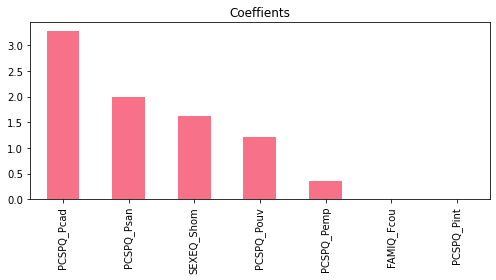

In [ ]:
plt.figure( figsize = ( 7,4 ) )
coef.plot( kind = 'bar' )
plt.title( 'Coeffients' ) 
plt.tight_layout()
plt.show()

**Q** What are the important variables? How to draw some conclusion/interpretation?
The most important variables are the socio-professional categories (i.e. executive), and the sex of the individual (i.e. male). 
Being a male executive thus seems to be highly correlated with card ownership. It is also posible that this first result reflects an overpresentation of male in executive branches. Since executive branches are associated with financial wealth and extensive asset management, it only makes sense to see the wealthiest individuals of the sample as more likely to own credit card. 

**Q** Is the Lasso penalty efficient?

The lasso penalty is equivalent to Ridge and elastic net penalties. Lasso reduces the model complexity by yielding sparse solutions to the optimization problem, at the cost of an additional biais in the $\beta$ parameters estimation  (variance-biais trade-off).
The results obtained with Ridge and *elastic net* are the same as the ones computed with Lasso so that the efficiency properties are comparable in our special case. 

We propose a slightly different of lasso, called adaptive lasso in order to reduce the biais of the estimations (Fan and Li (2001) for the oracle framework, Zou (2006) for the adaptive lasso).

The objective of adapative lasso is to weight the $L_1$ norm of the $\beta$ associated to the regularization term $\lambda$ in order to correct the bias: 

$min_{\lambda, \beta} S(\lambda;\beta) = L(X;\beta) + \lambda w|\beta|_{1}$ $\space \space \space \space \space \space \space \space \space (1.1)$

with $w$ a vector of weight parameters, and $L(X;\beta)$ $ = \frac{1}{2}{||Y-X\beta||^2}_2$


The weights estimates $\hat w_j$ are simply equal to $\frac{1}{|\hat\beta_j|} \forall j \in [1;p] $

*Elastic net is a mixture of ridge and lasso, and gives more balanced results in high dimension. With $p$ = 7, it is equivalent to lasso and ridge. 

It would be interesting to compare with the *ridge* and *elastic net* model

### Adaptive Lasso

In [ ]:
ll = 0.01
g = lambda w: np.log(ll + np.abs(w))
gprime = lambda w: 1. / (ll + np.abs(w))
p_obj = lambda w: 1. / (2 * n_samples) * np.sum((yApp - np.dot(xApp, w)) ** 2) \
                  + alpha * np.sum(g(w))

n_samples, n_features = xApp.shape
weights = np.ones(n_features) #gets the number of weights that needs to be computed for Adaptive Lasso
n_lasso_iterations = 5 # 

for k in range( n_lasso_iterations ):
    X_w = xApp / weights[np.newaxis, :]
    alasso_reg = LogisticRegression( penalty = 'l1',random_state = 0, solver = 'liblinear' )
    alasso_reg.fit( X_w, yApp )

    CV_reg_alasso =GridSearchCV(LogisticRegression( penalty = 'l1', solver = 'liblinear' ), param, cv = 5 )
    logitALasso = CV_reg_alasso.fit( X_w, yApp )
     

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish t

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

In [ ]:
# Computation of the loss
print("Best learning rate = %f, Best parameter  = %s" %
      ( 1.-logitALasso.best_score_,logitALasso.best_params_ ) )
# same learning rate as with Lasso

Best learning rate = 0.239861, Best parameter  = {'C': 0.5}


In [ ]:
# Prediction with the model
for k in range( n_lasso_iterations ):
    X_w_test = xTest / weights[np.newaxis, :]
    yChap_ALasso = logitALasso.predict( X_w_test )
# TODO:  compute the  confusion matrix with the help of pd.crosstab
table = pd.crosstab( yChap_ALasso, yTest )
print( table )

# Error on the test set
print("Test error - Adaptive Lasso Logistic regression  Lasso = %f" % ( 1-logitALasso.score( X_w_test, yTest ) ) )
# the false negative is the most costly error: we predict no card when the individual actually has one
# loss of a client

CARVP    0   1
row_0         
0      103  23
1       29  45
Test error - Adaptive Lasso Logistic regression  Lasso = 0.260000


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

### ROC Curve

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report


Logit_elastic_net = LogisticRegressionCV( cv = 5, penalty = 'elasticnet', solver = 'saga', max_iter = 5000  )
Logit_elastic_net.fit( xApp, yApp )

print("Logistic Regression: {} || Elasticnet: {}".format(logitLasso.score( xApp, yApp ), Logit_elastic_net.score( xApp, yApp ) ) )

# Print out some more metrics
print( "Logistic Regression" )
print( classification_report( yApp , logitLasso.predict( xApp ) ) )
print( "Elastic Net" )
print( classification_report( yApp, Logit_elastic_net.predict( xApp ) ) )

ValueError: Logistic Regression supports only penalties in ['l1', 'l2'], got elasticnet.

In [ ]:
print("Logistic Regression: {} || Elasticnet: {}".format(logitRidge.score( xApp, yApp ), Logit_elastic_net.score( xApp, yApp ) ) )

# Print out some more metrics
print( "Logistic Regression" )
print( classification_report( yApp , logitRidge.predict( xApp ) ) )
print( "Elastic Net" )
print( classification_report( yApp, Logit_elastic_net.predict( xApp ) ) )

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


NotFittedError: This LogisticRegressionCV instance is not fitted yet

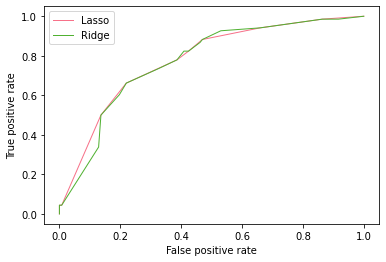

In [ ]:
from sklearn.metrics import roc_curve
listMethod = [ ["Lasso",logitLasso],["Ridge",logitRidge] ]

for method in enumerate( listMethod ):
    probas_ = method[1][1].predict_proba( xTest )
    fpr, tpr, thresholds = roc_curve( yTest, probas_[:,1] )
    plt.plot( fpr, tpr, lw=1,label = "%s"%method[1][0] )
plt.xlabel( 'False positive rate' )
plt.ylabel( 'True positive rate' )
plt.legend( loc = "best" )

plt.show()

NotFittedError: Call fit before prediction

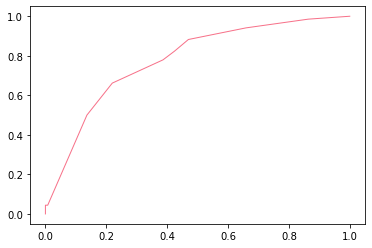

In [ ]:
from sklearn.metrics import roc_curve
listMethod = [ ["Lasso",logitLasso],["Elastic net",Logit_elastic_net] ]

for method in enumerate( listMethod ):
    probas_ = method[1][1].predict_proba( xTest )
    fpr, tpr, thresholds = roc_curve( yTest, probas_[:,1] )
    plt.plot( fpr, tpr, lw = 1,label = "%s"%method[1][0] )
plt.xlabel( 'False positive rate' )
plt.ylabel( 'True positive rate' )
plt.legend( loc="best" )

plt.show()

NotFittedError: Call fit before prediction

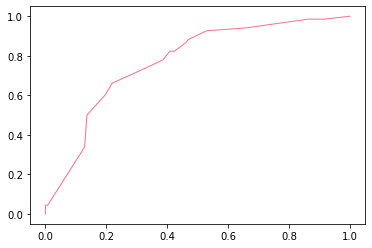

In [ ]:
from sklearn.metrics import roc_curve
listMethod = [ ["Ridge",logitRidge],["Elastic net",Logit_elastic_net] ]

for method in enumerate( listMethod ):
    probas_ = method[1][1].predict_proba( xTest )
    fpr, tpr, thresholds = roc_curve( yTest, probas_[:,1] )
    plt.plot( fpr, tpr, lw = 1,label = "%s"%method[1][0] )
plt.xlabel( 'False positive rate' )
plt.ylabel( 'True positive rate' )
plt.legend( loc="best" )

plt.show()

## Discriminant analysis
Three methods are availables: parametric ones with LDA-QDA and a non parametric one (*k* nearest neighbor).

In [ ]:
from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier

### Linear Discriminant Analysis (LDA)
Estimation of the model (there is no feature selection step) and then prediction over the test set.


<p style='text-align: justify;'

Linear Discriminant Analysis was first proposed by Fisher in 1936 as a method to predict (well separated) $k$ classes, in response to logistic regression model's instabilities. We hereby study the case of a two-category classification problem i.e., card-ownerniship or no. Using Bayes' Theorem to derive the best classifier, i.e., with the lowest possible $total$ error rate out of all classifiers (provided that the Gaussian model is correct): 

$P(Y=1| X=x)$ $= \frac{{\pi_k}{f_k}(x)}{\sum \limits_{l=1}^{K}{{\pi_l}{f_l}}(x) } $ $ \forall k = $  {$0;1$}      $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.1$)


such that 

${\pi_k}$ being the prior probability that a random chosen observation belongs to the class of card-owners coded as $k=1$ 

${f_k}(X)= P(X=x| Y=k)$  being the conditional density function of $X$ for an observation belonging to the $k^{th}$ class $ \forall k = $  {$0;1$}


We thus estimate prior ${\pi_k}$ and the conditional probability density function ${{f_k}}(X)$ by $\hat{\pi_k}$ and  $\hat{{f_k}}(X)$ respectively in order to plug them in the posterior $(1.1)$. 

We assume that the predictors $X$ are normally distributed according to a $N(\mu_k, \Sigma)$ with a class-specific mean-vector of size ($k$x$1$) and homoskedastic, that is, there is a common covariance matrix $\Sigma$ of size ($p$x$p$) across both classes. We plug the resulting multivariate gaussian distribution function in $(1)$ as the $\hat{{f_k}}(X)$.
The unbiased maximum likelihood estimates  $\hat\mu_k$ and $\hat\sigma^2$ for $\mu_k$ and $\sigma^2$ are used to compute ${{f_k}}(X)$ $ \forall k, \space \space  \forall p  $: 


$\hat\mu_{k,p} = \frac{1}{n_k}\sum \limits_{i:y_i =k}{}x_{i,p}$ 

$\hat\Sigma = \frac{1}{n_K}(x_i - \hat\mu_k)^T(x_i - \hat\mu_k)
  \forall k = $  {$0;1$} $ \space \space \space \space \space  \space \space (1.2)$


Naturally, $\hat{\pi_k}$ is equal to the empirical sample share of individual belonging to class $k$:


$\hat{\pi_k}$ = $\frac{n_k}{n} \forall k = $  {$0;1$} $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.3$)


The Bayes classifier thus assigns an observation $X=x$ to the class for which the estimate $\hat{P}(Y=1| X=x)$ is largest (i.e. greater than $1/2$).
Taking the log of ($1.1$) with $\hat{{f_k}}(X)$ and $\hat{\pi_k}$ and simplifying the constant terms yields the following Bayes decision boundary rule: 

"$Assign$ $y_i$ $to$ $k=1$ $\iff$ $2x^T(\mu_1 - \mu_2) + log(\pi_1) - log(\pi_2) \ge {\mu_1}^T{\mu_1} - {\mu_2}^T{\mu_2}$ and to $k=0$ otherwise."  ($1.4$)


The Bayes decision boundary thus corresponds to the point where 
$ x= 2(\mu_1 - \mu_2)^{-1}({\mu_1}^T{\mu_1} - {\mu_2}^T{\mu_2} -log(\frac{\pi_1}{\pi_2})) = \frac{1}{2}[({\mu_1 + \mu_2})-(\mu_1 - \mu_2)^{-1}({log(\frac{\pi_1}{\pi_2})})]$ $\space$ $\space$ $\space$ $\space$ $\space$  $\space$ $\space$ ($1.5$)

The $LDA$ classifier plugs the estimates given in $(1.2)$ and $(1.3)$ into ($1.4$) in order to assign an observation $X=x$ to the most probable class.

The performance metric of interest here is the test error rate (not be mistaken with the training error rate). We expect the classifier to perform worse if we were to predict a new set of individuals would own credit cards or not. Indeed, the fitting of the model i.e. the parameters estimation is specifically done on the training set. Nonetheles, the train test split has been randomized and the ratio of parameters $p$ to number of samples $n$ as $\rho= \frac{14}{1063}=0.013$ is close to 0 so we do not expect overfitting. 

To that extent, a bank or a credit card company might be particulary sensitive to false negatives, that is, individuals who $are$ card owners but who are misclassified as $non-card$ $owners$ by the $LDA$ classifiers.


It might be that the initial threshold of $50%$ for the posterior probability in the two-class case fails short at meeting such needs. We could instead lower that threshold to say 20% in order to decrease the false negative rate, at the expense of an increase in the false positive rate that is less costly to a bank trying to grow its consumer base







In [1]:
yApp.size

NameError: ignored

In [ ]:
def prior(df):
  ratio = df[df==1].size/df.size
  return ratio

In [ ]:
prior(yApp)

In [ ]:
# TODO:
# 1. Define the model ('lda' as discriminant_analysis.LinearDiscriminantAnalysis)
# 2. Fit the model
# 3. Predict on the test set
# 4. Compute the confusion matrix
 
lda = discriminant_analysis.LinearDiscriminantAnalysis( solver = 'svd', shrinkage = None, priors = None, n_components = None, store_covariance = False, tol = 0.0001 )
lda.fit(xApp, yApp)
# Prediction on the test set
print("Erreur de test lda = %f" % (1-lda.score(xTest,yTest)))


In [ ]:
lda.explained_variance_ratio_

In [ ]:
pd.DataFrame( confusion_matrix( yTest, lda.predict( xTest ) ) )
# same results as with Ridge, Lasso and Elastic Net

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( lda, xTest, yTest, display_labels = yTest.values, cmap = plt.cm.Blues )  
plt.show()

**Q** What about the quality of the prediction? The ability of interpret the method?

The quality of the prediction is exactly the same as with Lasso, Ridge and Elastic net in terms of metrics. Still, the interpretability is rather trickier than previously since the method involves Bayesian probability theory and "reversed learning" so-to-speak.

**Q** What is the meaning of the  *warning*? What are the variables involved by this warning?
The dummy variables are colinear. 
As we saw previously throughout the Linear Discriminant Analysis, the decision rule maximizes the posterior probability that a sample belongs to a group "card_owner" or "no card_owner" and can be written as  

$L_i = (X - \mu_i)^t \Sigma_i (X - \mu_i) + log(|\Sigma_i| - 2log(\pi_i) \forall i \in [0;1]$

<--> with estimates plugged-in

$\hat L_i = (X - \hat\mu_i)^t \hat\Sigma_i (X - \hat\mu_i) + log(|\hat\Sigma_i| - 2log(\pi_i) \forall i \in [0;1]$


In fact, if we reformlate $\hat L_i $ in Spectral terms with a little bit of Linear Algebra, we can rewrite the matrices 
$(X - \mu_i)^t (X - \mu_i)$ is a squared matrix, positive definite, and can be diagonalized if the $X$ variables *are not* colinear. 
The equation can be expresses as a polynome in $X$ of order 2. It is thus a linear application of $X$ and when the matrix is invertible, $(A - \lambda I_p)X = 0 $ has a unique solution.

One can thus re-write $\hat L_i$ as a linear combination of the covariance matrix eigenvalues and eigenvectors, minus a contribution from the prior probabilities.
When the $X$ are highly colinear, the eigenvalues are very close to 0, and their inverse are thus very large, $\hat L_i$ will in turn be very large and its variance will tends to infinity. This is a first instability issue. 

The second issue related to colinearity in the context of Quadratic Discriminant Analysis is the closeness between the directions spanning  $\hat L_i$. Because $\hat L_i$ is a linear combination of very similar vectors, it is ill-suited to distinguish between the groups (the information provided by the data are too similar!). One could only consider the $K$ largest eigenvalues instead to run QDA when there is a colinearity issue (Noes and al., 2001). Alternatively, one could look at the VIF or at correlations and select variables according to an arbitrary threshold. 



### Quadratic Discriminant Analysis

In [ ]:
# Same procedure as the one of LDA for QDA

# TODO:
# 1. Define the model ('qda' as discriminant_analysis.LinearDiscriminantAnalysis)
# 2. Fit the model
# 3. Predict on the test set
# 4. Compute the confusion matrix
 
qda = discriminant_analysis.QuadraticDiscriminantAnalysis( tol = 0.0001 )
qda.fit( xApp, yApp )
# Prediction on the test set
print( "Erreur de test lda = %f" % ( 1-qda.score(xTest,yTest ) ) )


In [ ]:
yChapQDA = qda.predict( xTest )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix( qda, xTest, yTest, display_labels = xApp.columns, cmap = plt.cm.Blues )  
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

### K Nearest Neighbors

In [ ]:
# TODO
# 1. Define the model with the 10 nearest neighbors (use KNeighborsClassifier)
# 2. Fit the model
# 3. Predict on the test set
# 4. Show the confusion matrix 

from sklearn.neighbors import KNeighborsClassifier
disKnn = KNeighborsClassifier( n_neighbors = 10 )
disKnn.fit( xApp,np.ravel( yApp.values ) )

confusion_matrix_disKnn = pd.crosstab(yTest, disKnn, colnames=["prediction"], rownames=["true value"])
print(confusion_matrix_disKnn, "\n")
# Prediction error on the test set
print("Erreur de test knn = %f" % (1-disKnn.score(xTest,yTest)))


CARVP    0   1
row_0         
0      103  23
1       29  45
Erreur de test knn = 0.285000


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [ ]:
def prediction(labels,pred):
    c=0 #Initialise le compteur à 0
    lim = int(len(pred))
    for i in range(lim):
        if pred[i]!=labels[i]:
            c=c+1 #+1 au compteur si si la prediction est différente du labels (pour chaque valeur)
    score=100-float(c)/lim*100 #Calcul du score
    return score

    prediction(labels_lr,pred_lr)

pred_knn = disKnn.predict( xTest ) 
labels_knn = np.ravel( yTest.values )
prediction( labels_knn,pred_knn )

71.5

In [ ]:
score_knn = disKnn.score( xTest,np.ravel( yTest.values ) )
score_knn

0.715

In [ ]:
#Optimization of the smoothing parameter (number of neighbors) k
#Grid 
param_grid = [{"n_neighbors":list( range( 1,15 ) ) }]
disKnn = GridSearchCV( KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1 )
disKnnOpt = disKnn.fit( xApp, yApp ) # GridSearchCV is itself an estimator 
# Optimal parameter 
disKnnOpt.best_params_["n_neighbors"]
print("Best score = %f, Best parameter = %s" % ( 1.-disKnnOpt.best_score_,disKnnOpt.best_params_) )

C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish t

Best score = 0.241020, Best parameter = {'n_neighbors': 12}


C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Charlotte\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rel

In [ ]:
# Prediction on the test set 
yChap = disKnnOpt.predict( xTest )
# Confusion matrix 
table=pd.crosstab( yChap,yTest )
print( table )

# Estimation of the prediction error on the test set 
print( "Error rate of knn_opt = %f" % ( 1-disKnnOpt.score( xTest,yTest ) ) )

CARVP    0   1
row_0         
0      122  47
1       10  21
Error rate of knn_opt = 0.285000


In [ ]:
#Grid 
param_grid=[{"n_neighbors":list(range( 1, 3, 5, 10, 15 ) ) }]
disKnn=GridSearchCV( KNeighborsClassifier(), param_grid,cv=5,n_jobs=-1 )

disKnnOpt=disKnn.fit( xApp, yApp )

disKnnOpt.best_params_["n_neighbors"]
print("Best score = %f, Best parameter = %s" % ( 1.-disKnnOpt.best_score_,disKnnOpt.best_params_ ) )

ROC curve

In [ ]:
from sklearn.metrics import roc_curve
# List of the methods 
listMethod=[["lda",yChap],["qda",yChapQDA],["knn",disKnnOpt]]
# Curves computation
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

NameError: name 'yChapQDA' is not defined

## [Binary decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
Binary trees are competing well versu logistic regression and are commonly used in datascience. In particular, their interpretation are simple, which is a great advantage of this method. However, the optimization of the parameters involved in this method is somewhat versatile.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Define and fit the model

tr = tree.DecisionTreeClassifier()
parameters = {
    "max_depth":range(1,10),
    "min_samples_leaf":range(1,10)}
tr_opti = GridSearchCV(tr, parameters, cv=5, scoring='accuracy')
tr_opti.fit(xApp, np.ravel(yApp.values))

score_opti_tr=tr_opti.best_score_
pred_opti_tr=tr_opti.predict(xTest)

tr.fit(xApp,np.ravel(yApp.values))
score_tr=tr.score(xTest,np.ravel(yTest.values))
print("On observe que le meilleur score pour la méthode arbre de la décision est :", score_opti_tr)
print("Paramètres optimisés pour la méthode arbre de la décision :",tr_opti.best_params_)
print('l ancien score était', score_tr)
# TODO

In [ ]:
pred_tr = tr.predict(xTest)
labels_tr=np.ravel(yTest.values)
prediction(labels_tr,pred_tr)

**Q** What is the default homogeneity criterion used by this method?

**Q** What is the major drawback of the pruning step in  `Scikkit-learn` when compared to the  `rpart` library in R?

The default homogeneity criterion used by this method is the Gini Index criterion.
We recall that a decision or a split is made when the partition of the data (i.e. the training set) minimizes the probability of misclassifiying a selected feature. 
If we define the random variable $X_k$ as being an accuretly classified feature in the data set, 
then $X_k$ follows a bernouilli distribution $B(p(k))$ $\forall k \in [1;p]$. Taking into account all features of the data set 
we have $(X_1, X_2, ..., X_p)$ the random vector following a Binomial distribution $B(n,p)$. 
The Gini Index aggregates the probability of misclassified features across all classes. 

In particular, one randomly selects a data point from the dataset. 
According to the class distribution in the dataset i.e., $P(C = c) \forall c \in C(\Omega)$
, the given data point is assigned to a class according to the same distribution. 

$ G = \sum{p(i)(1 - p(i)}  $ 
When $G = 0$, the classification deterministically assign every feature to the correct class, and when $G = 1$, all features are misclassified. 


The Gini Impurity is used in R with the CART package does not consider the probability of picking a data point with the class $i$ but rather the probability of having a misclassified point within each class. 

In [ ]:
# Optimization of the depth of the tree
#TODO

# optimal parameter
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - tr_opti.best_score_,tr_opti.best_params_))


In [ ]:
# Prediction on the test set
yChap = tr_opti.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)# Prediction error on the test set
print(" Prediction error on the test set = %f" % (1-tr_opti.score(xTest,yTest)))

In [ ]:
# Visualization
!pip install --upgrade scikit-learn==0.20.3
!pip install pydotplus
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier
import pydotplus
treeG=DecisionTreeClassifier(max_depth=tr_opti.best_params_['max_depth'])
treeG.fit( xApp,yApp )
dot_data = StringIO() 
export_graphviz( treeG, out_file=dot_data ) 
graph=pydotplus.graph_from_dot_data( dot_data.getvalue() ) 
graph.write_png("treeOpt.png")  

In [ ]:
from IPython.display import Image
Image(filename='treeOpt.png')

### [Roc curve ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
Comparison of the previous methods

The default threshold   (0.5) is not necessarily the best one, and it is necessary to compare the ROC curves.

In [ ]:
# Liste of the  methods 
listMethod=[["Logit",logitLasso],["lda",yChap],["Arbre",tr_opti]]
# Roc curves 
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="best")
plt.show()

Comment the results.

**Q** Interest of the logistic regression when compared to the LDA?
Firstly, Logistic Regression (LR) does not require any assumption with respect to the data distribution, which often yields more robust results than with LDA ( Liong and al., 2013 ). 

LR is also easier to interpret than LDA since it does not require any Bayesian Probabilistic Framework


**Q** Consequence of the ROC curve crossing on the AUC evaluation?
The ROC curve crossing on the AUC evaluation might be a consequence of heteroskedasticity (violating the LDA assumption), or of non-linearity of the predictors (Kwok M. Ho, 2017), or of non-normality. In the case of non-linearity, "centering the predictors can reducs its bias towards null predictive" (Kwok M. Ho) ability.  

The size of the test set (200) is modest...

## [Aggregation methods](https://en.wikipedia.org/wiki/Ensemble_learning)
We mainly compare here the three algorthms: *bagging, random forest, boosting*.

### *Bagging*

**Q** What is the default aggregated algorithm? 
The default aggregated algorithm for bagging is a decision tree classifier.


**Q** What is the default number of estimators ? Is it necessary to optimize this number?
The default number of estimators is 10 which is equivalent to the number of trees for the Decision Tree classifier.
It is necessary to optimize this number because 10 is small and we should increase the number of trees until the model performance stabilizes.

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag= base_estimator(SVC(), n_estimators=100, random_state=0) # Def model (nestim =100)
bagC=bag.fit(xApp, yApp)
# Prediction on the test set
yChap = bagC.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Prediction error with bagging = %f" % (1-bagC.score(xTest,yTest)))


**Q** Run this previous cell several times. What do you think about the stability of the method and about the its reliability?

### *Random forest*


Asymptoticaaly stable

**Q** What is the parameter to be optimized for this algorithm? What is its default value?

**Q** Is the number of trees a versatile parameter?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
bag = BaggingClassifier(n_estimators=100)
bagC = bag.fit(xApp, yApp)

# Prediction on the test set
yChap_bag = bagC.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_bag, yTest, colnames=["true value"], rownames=["prediction"])
print(table, "\n")

# Prediction error on the test set
print("Prediction error with bagging = %f" % (1-bagC.score(xTest,yTest)))

**Q** 
    Run this previous cell several times. What do you think about the stability of the method and about the its reliability?
</font>

The stability of the method first depends on the redundancy in the features (i.e. correlation, mutual information.. ). Moreover, the forest is built using trees grown on randomly sampled attributes and samples. Lastly, a number of estimators and/or a sample size that is too low might result in a high variance in feature importance. In particular, the synthetic indictor $\frac{n_feature}{n_sample}$ seems to be negatively correlated to intrisic stability. (Wang and al,. 2016) "A high-dimensional, small-sample and high complexity datasets may suffer more from instrisic instability of VIMs" (Wang and al., 2016).

In [ ]:
# Optimization  of max_features
param=[{"max_features":list(range(2,10,1))}]

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100,max_depth=20,random_state=0) 
rf.fit(X_train,np.ravel(Y_train.values))  

pred_rf = rf.predict(xTest)
labels_rf=np.ravel(yTest.values)
prediction(labels_rf,pred_rf)


score_rf=rf.score(xTest,np.ravel(yTest.values))
score_rf


from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_estimators=100,random_state = 0) 
parameters = {
    "max_depth":range(1,15),
    "min_samples_leaf":range(1,20)}
rf_opti = GridSearchCV(rf,parameters,cv=5,scoring='accuracy')
rf_opti.fit(xApp.values,np.ravel(yApp.values))

score_opti_rf=rf_opti.best_score_
pred_opti_rf=rf_opti.predict(xTest)

print("On observe que le meilleur score pour la méthode Random Forest est :", score_opti_rf)
print("Paramètres optimisés pour la méthode Random Forest est :",rf_opti.best_params_)
print('l ancien score était', score_rf)




rfOpt=rf.fit(xApp, yApp)





# optimal parameter 
print("Best score = %f, Best parameter = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
# Prediction on the test set
yChap = rfOpt.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Prediction error with  random forest opt -quantitative = %f" % (1-rf_opti.score(xTest,yTest)))

B) Random forest
Q What is the parameter to be optimized for this algorithm? What is its default value?

The optimizable parameter is the number of features to be considered when looking for the best split. In SKLEARN, this refers to "max_features". The default value here is "auto", which refers to the square root of the number of features "n_features".

Q Is the number of trees a versatile parameter?

The number of trees is a versatile parameter called "n_estimators" is this algorithm, set to 100 by default.

### *Gradient boosting*

**Q** What is the historical *boosting* algorithm? Which one is used now?
The very first boosting algorithms were those of Robert Schapire (recursive majority gate formulation) and Yoav Freund (boost by majority). However, they were not adaptive and only operated a small improvement on the "weak learners". Hence, they collaborated and created AdaBoost (or adaptive boosting) which became the reference, even rewarding its owners by the Gödel Prize. Today, Gradient Boosting is the state of the art in boosting algorithms.

**Q** What are the important parameters to be tuned? How to calibrate them??
These are the number of estimators and the learning rate. They should be calibrated using a combination of grid search and cross validation, which will test our data on different models and select the most accurate one.
**Q** What is the default value of the parameter that is not optimized below?

Said-parameter is the loss function to be used. The default parameter is "deviance" here, which refers to a logistic regression. The other parameter is "exponential", translating to the original Adaboost algorithm.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Optimization of two parameters
paramGrid = [
  {'n_estimators': list(range(100,601,50)), 'learning_rate': [0.1,0.2,0.3,0.4]}
 ]
gbmC= GridSearchCV(GradientBoostingClassifier(),paramGrid,cv=5,n_jobs=-1)
gbmOpt=gbmC.fit(xApp, yApp)
# Optimal parameters
print("Best score = %f, Best parameters = %s" % (1. - gbmOpt.best_score_,gbmOpt.best_params_))

In [ ]:
# Prediction on the test set
yChap = gbmOpt.predict(xTest)
# Confusion matrix
table=pd.crosstab(yChap,yTest)
print(table)

# Prediction error on the test set
print("Test error of gbm opt = %f" % (1-gbmOpt.score(xTest,yTest)))

### Courbes ROC

In [ ]:
# List of the methods
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt],["RF",rfOpt],["GBM",gbmOpt]]
# ROC curves computation 
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
plt.legend(loc="best")
send(plt,17)
plt.show()

The algorithm which is easiest to interpret, in my opinion, is the Logit. I believe it is also the best one here since it requires less computation power and yet yields the same results as the others.

Q What can you say about the extreme gradient boosting ? Number of parameters to be tuned? In Python? In R? Its diffusion?

XGBoost seems to be a highly effective and computationally efficient open source gradient boosting algorithm. According to Szilard Pafka, who made a benchmark of different gradient boosting and bagged decision trees algorithms in 2015, XGBoost was almost always faster than the other benchmarked implementations from R, Python Spark, and H2O.

The main parameters to be tuned, in my humble opinion, are the following (this applies to both R and Python):

number of features
learning rate
maximum depth of a tree

**Exercice** Add the deep learning and SVM family of methods.

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,np.ravel(Y_train.values))

In [ ]:
pred_XGB = XGB.predict(xTest)
labels_XGB=np.ravel(yTest.values)
prediction(labels_XGB,pred_XGB)

In [ ]:
score_XGB=XGB.score(xTest,np.ravel(yTest.values))
score_XGB

In [ ]:
XGB = XGBClassifier()
parameters = {
    "max_depth":range(3,10)}
XGB_opti_2 = GridSearchCV(XGB,parameters,cv=5, scoring='accuracy')
XGB_opti_2.fit(xApp,np.ravel(yApp.values))

score_opti_XGB_2=XGB_opti_2.best_score_
pred_opti_XGB_2=XGB_opti_2.predict(xTest)


print("On observe que le meilleur score pour la méthode XGBoost est :", score_opti_XGB_2)
print("Paramètres optimisés pour la méthode XGBoost est :",XGB_opti_2.best_params_)
print("L'ancien score était",score_XGB_2)


## SVM

In [ ]:
from sklearn.svm import SVC
# Optimization of two parameters
paramGrid = [
  {'kernel': ["linear", "poly", "rbf"], 'C': [0.1, 0.5, 1, 2]}
]
svc_model = GridSearchCV(SVC(), paramGrid, cv=5, n_jobs=-1)
svcOpt = svc_model.fit(xApp, yApp)

# Optimal parameters
print("Best score = %f, Best parameters = %s" % (1. - svcOpt.best_score_, svcOpt.best_params_))

In [ ]:
# Prediction on the test set
yChap_svc = svcOpt.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_svc, yTest, rownames=["prediction"], colnames=["true value"])
print(table, "\n")

# Prediction error on the test set
print("Test error of SVM opt = %f" % (1-svcOpt.score(xTest, yTest)))

## Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
# Optimization of two parameters
paramGrid = [{
    'hidden_layer_sizes': [(5, 2), (10, 5), (50, 10)],
    'activation': ["identity", "relu", "logistic", "tanh"],
   'solver': ["lbfgs", "sgd", "adam"],
    "alpha": [1e-5, 1e-10, 1e-15]
}]
mlp = GridSearchCV(MLPClassifier(), paramGrid, cv=5, n_jobs=-1)
mlpOpt = mlp.fit(xApp, yApp)

# Optimal parameters
print("Best score = %f, Best parameters = %s" % (1. - mlpOpt.best_score_, mlpOpt.best_params_))

In [ ]:
# Prediction on the test set
yChap_mlp = mlpOpt.predict(xTest)

# Confusion matrix
table = pd.crosstab(yChap_mlp, yTest, rownames=["prediction"], colnames=["true value"])
print(table, "\n")

# Prediction error on the test set
print("Test error of MLP opt = %f" % (1-mlpOpt.score(xTest, yTest)))